In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from wavelets import *
from draws import *
from lyapunov_exponents import *
from multistability import *
from BP_dynamics import *
import pywt
from Poincare import dist, jacobian, poincare, poincare_3D, bifurcation_diagram

In [4]:
plt.rcParams.update({'font.size': 25})

## Определение параметров системы:

In [5]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметр
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)


scale = np.linspace(0, 60, 101)

# Решение системы ФХН при фиксированном параметре $Bbp = 0.12$ и изменении $Bpb = 0.15-0.3$

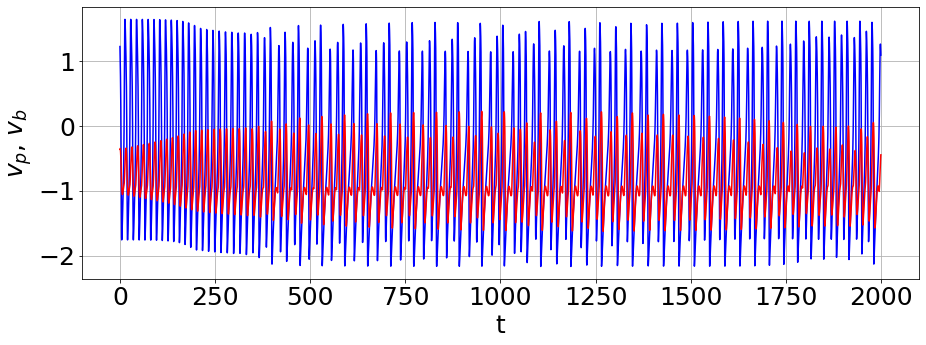

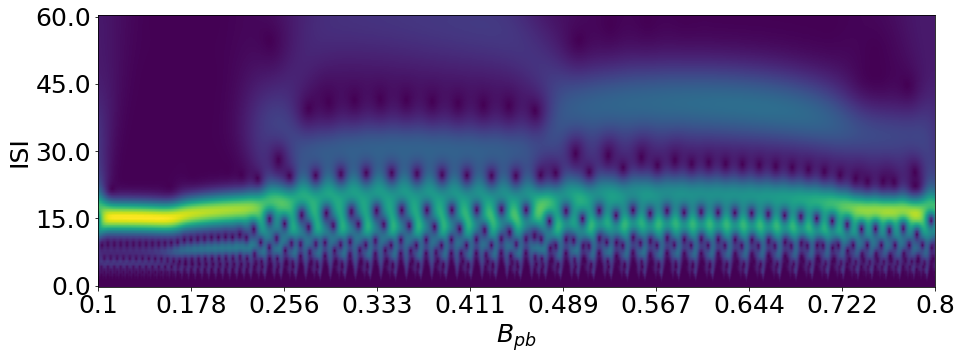

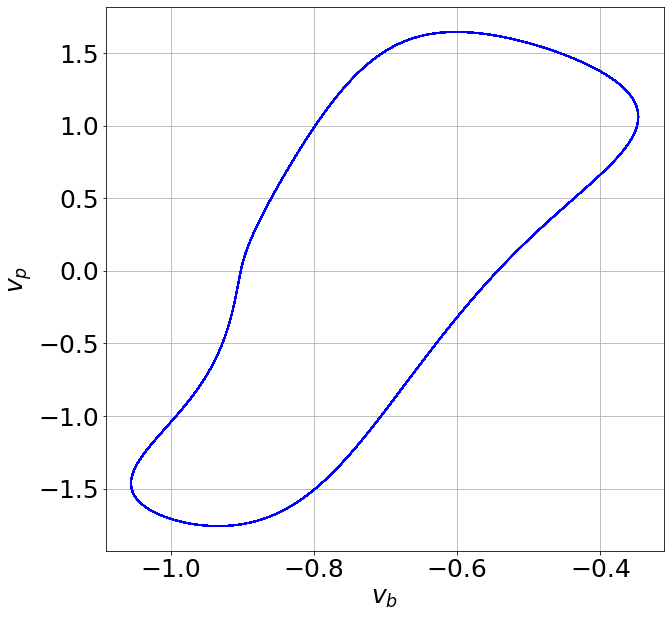

In [7]:
Bbp = 0.12 
Bpbmin = 0.1 
Bpbmax = 0.8 

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)

wavelet_draw(args, args2, scale, ts=2000, nt=2**15, Bmin=Bpbmin, Bmax=Bpbmax)

phase_portrait(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)

## Далее следует исследование области при $B_{bp} = 0.12$ и $B_{pb} = 0.22-0.26$ при уменьшенном шаге по параметру Bpb (в данной области ожидаем увидеть хаос)

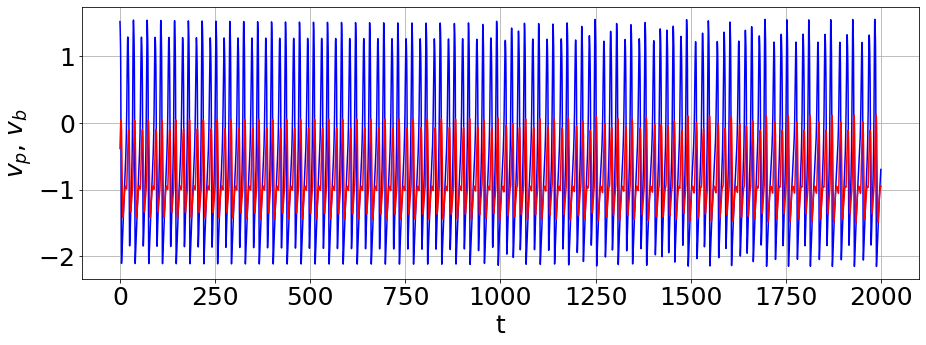

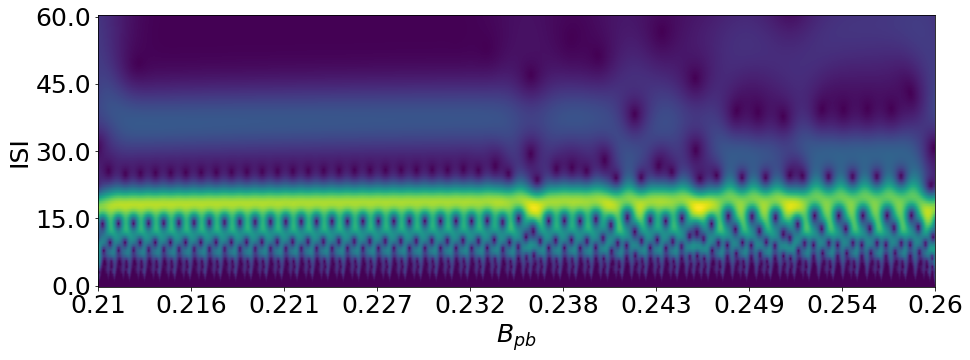

In [8]:
Bbp = 0.12 # синаптический параметр
Bpbmin = 0.21 # синаптический параметр
Bpbmax = 0.26 # синаптический параметр

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)

wavelet_draw(args, args2, scale, ts=2000, nt=2**15, Bmin=Bpbmin, Bmax=Bpbmax)

## Далее рассчитаем показатель Ляпунова по определению: будем смотреть на расхождение изначально близких траекторий и рисовать логарифм расхождения, таким образом, пронаблюдаем показатель экспоненты.

(32768, 6) (32768,)
32768


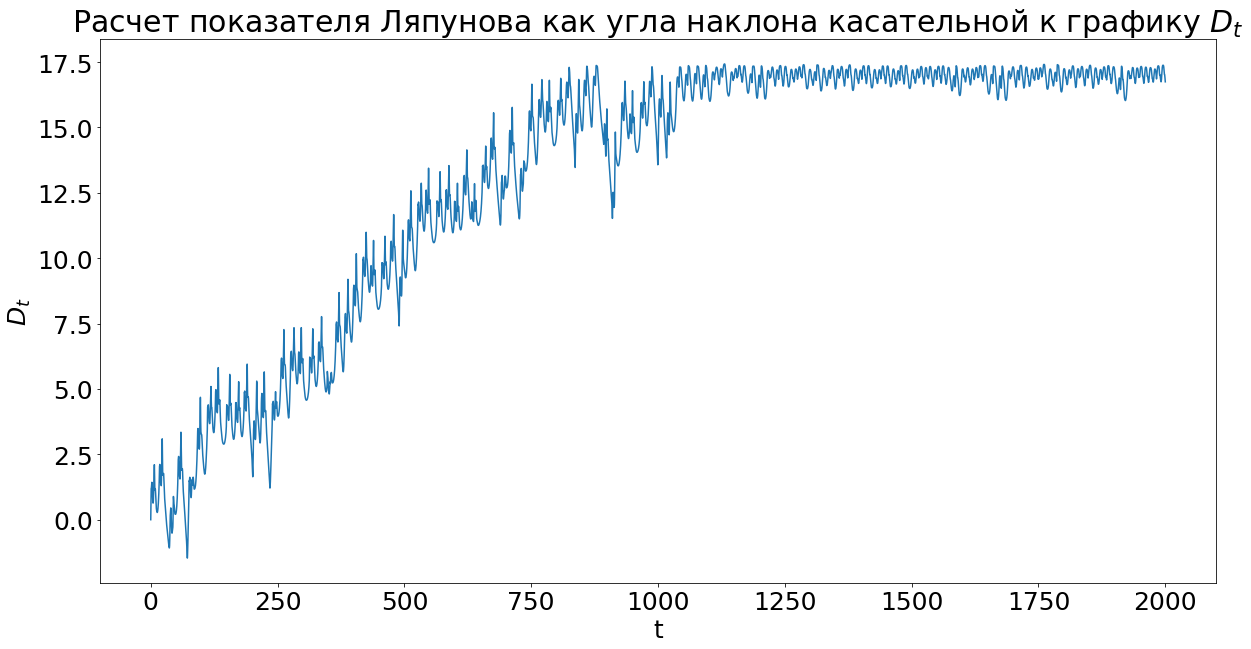

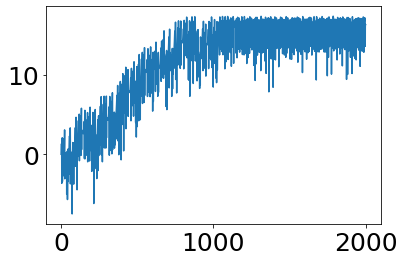

In [115]:
Bbp = 0.12
Bpb = 0.235

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

sol, t = calcODE(args, -1.5, -1.5, 0.5, 0.5, 0.5, 0.5, ts=3000, nt=2**15)

print(sol.shape, t.shape)
print(2**15)

ts = 3000
sol1, t = calcODE(args, *sol[-1], nt=2**15)
sol2, t = calcODE(args, *(sol[-1] - [0.0000001, 0, 0, 0, 0, 0]), nt=2**15)

plt.figure(figsize=(20, 10))
plt.plot(t, np.log(np.linalg.norm(sol1 - sol2, axis=1) / и
                   np.linalg.norm(sol1[0] - sol2[0])))
plt.title("Расчет показателя Ляпунова как угла наклона касательной к графику $D_t$")
plt.xlabel("t")
plt.ylabel("$D_t$")
plt.show()

plt.plot(t, np.log(np.abs(sol1[:, 0] - sol2[:, 0]) / 
                   np.linalg.norm(sol1[0] - sol2[0])))
plt.show()


In [124]:
Bbp = 0.12
Bpb = 0.235

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

mean_lyap, std_lyap = lyapunov_first_statistics(args, 50)

In [125]:
mean_lyap

0.021543770819915594

In [159]:
lyapunov_first(args)

0.016411754125779013

In [11]:
Bbp = 0.12 
Bpbmin = 0.22 
Bpbmax = 0.5 

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)
scale = np.linspace(0, 60, 100)

args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)
directly = max_wavelet_bootstrap(args, args2, scale)

args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bbp, Bpbmax, Bpbmin, vsl)
inverse = max_wavelet_bootstrap(args, args2, scale)

(100, 32768, 100)
(100, 32768, 100)


(5.0, 25.0)

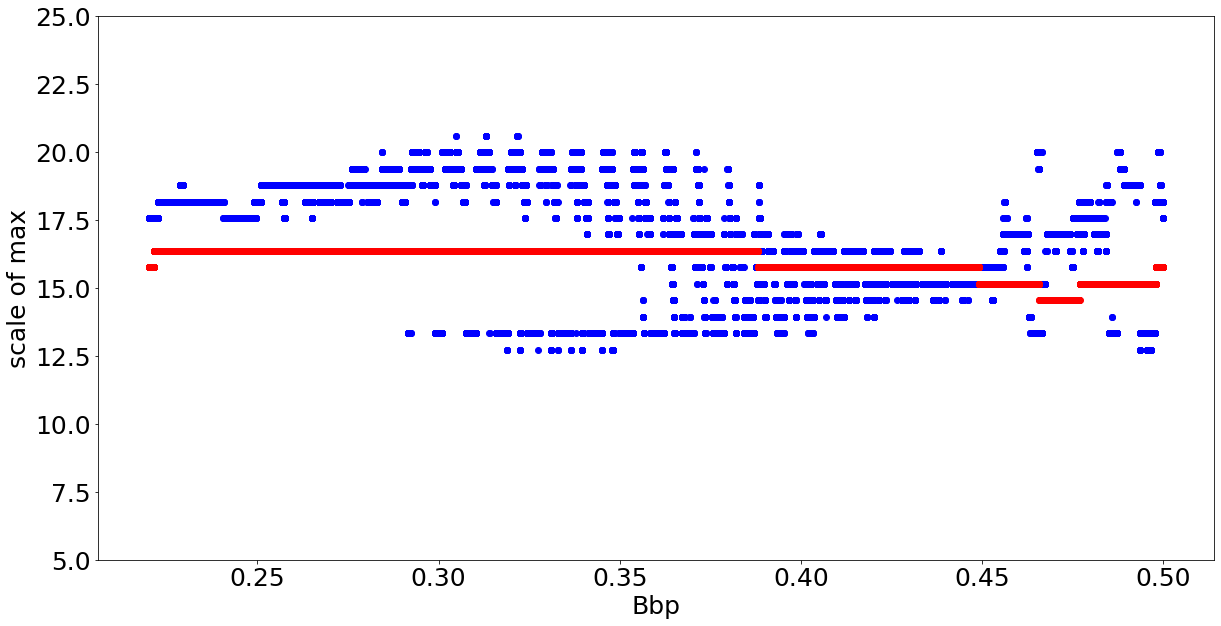

In [28]:
plt.figure(figsize=(20, 10))
plt.scatter(np.linspace(Bpbmin, Bpbmax, len(directly[0])), directly[0], c='b')
plt.scatter(np.linspace(Bpbmin, Bpbmax, len(inverse[0])), inverse[0][::-1], c='r')
plt.xlabel('Bbp')
plt.ylabel('scale of max')
plt.ylim(5, 25)
# plt.title('Петля гистерезиса')

## Найдем характерные периоды колебаний аттракторов: гистограммы ниже по порядку: область до предполагаемого хаоса, область хаоса и область после хаоса для параметров B

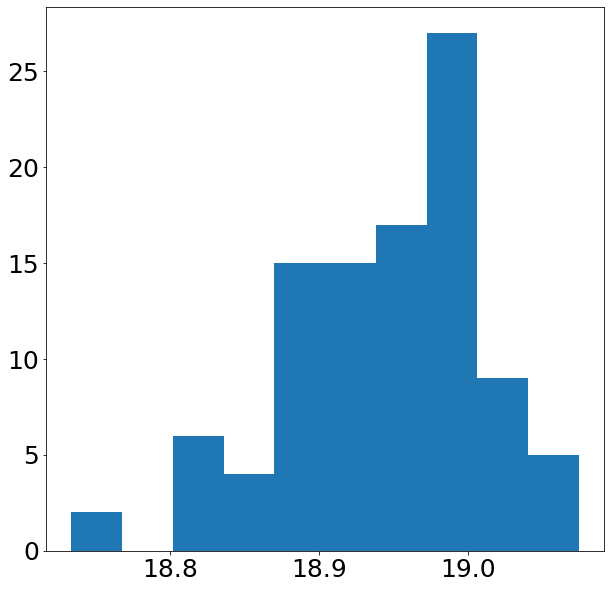

In [37]:
Bbp = 0.12
Bpbmin = 0.24 
Bpbmax = 0.26 
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

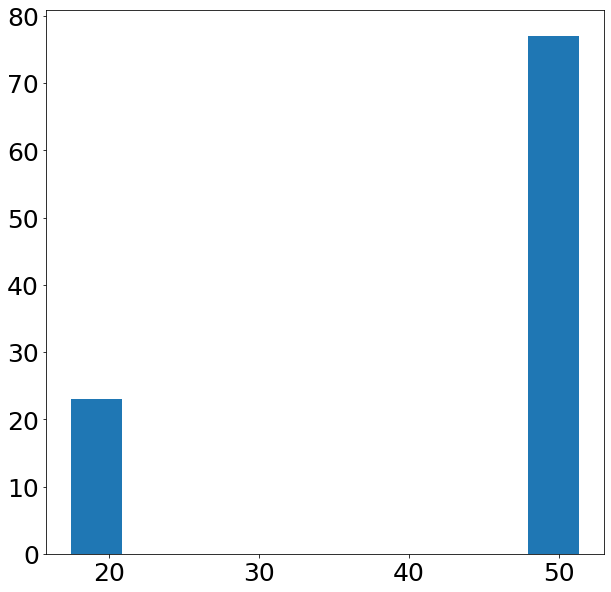

In [15]:
Bbp = 0.12
Bpbmin = 0.235
Bpbmax = 0.235
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

T_of_attractors(args2, 100)

## Далее следует исследование области при $B_{bp} = 0.12$ и $B_{pb} = 0.44-0.48$ при уменьшенном шаге по параметру Bpb (в данной области ожидаем увидеть хаос)

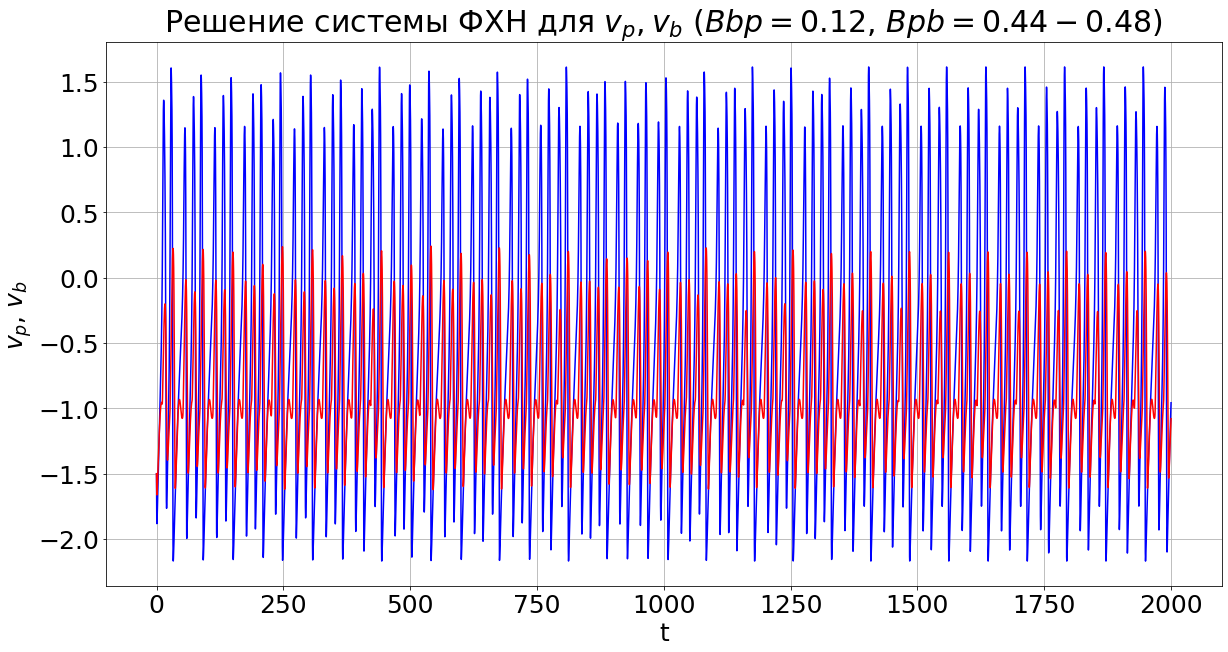

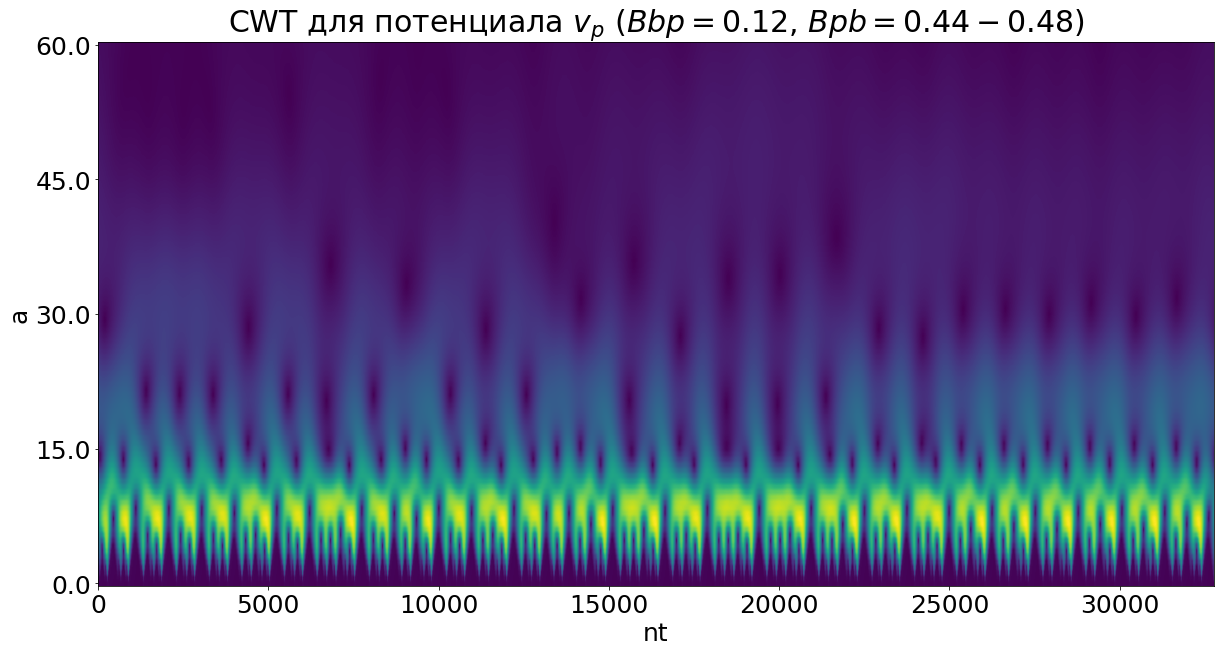

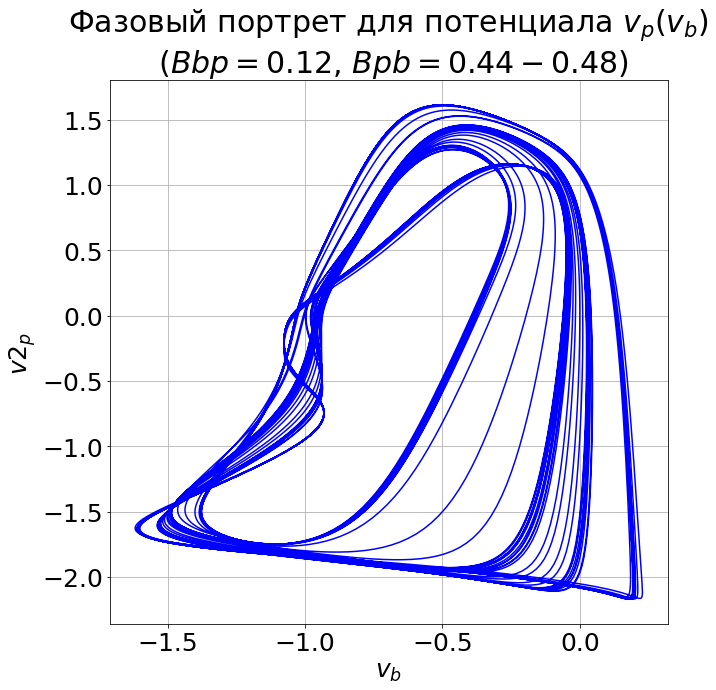

In [11]:
Bbp = 0.12 
Bpbmin = 0.44 
Bpbmax = 0.48 

args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)
args2 = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bpbmax, Bbp, vsl)

signal_draw2(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)
wavelet_draw(args2, scale, ts=2000, nt=2**15)
phase_portrait(args, args2, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=2000, nt=2**15)

## Отображение Пуанкаре

In [6]:
Bbp = 0.12
Bpb = 0.1
Bpbmin = 0.1
Bpbmax = 0.8


args = (Iext, G, Ein, Eex, eps, a, b, A, Bpbmin, Bbp, vsl)

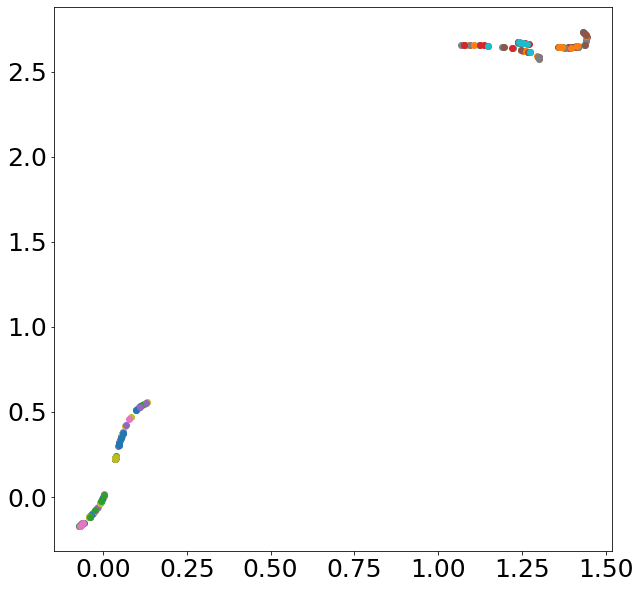

In [23]:
Bbp = 0.12
Bpb = 0.455
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

_, _ = poincare(args, Bpb)

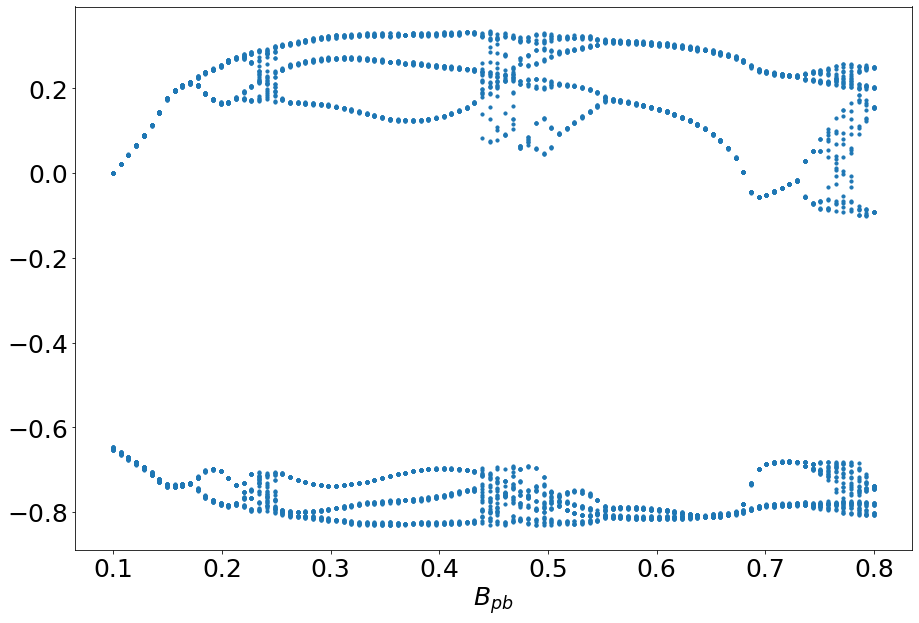

In [14]:
periods, xs = bifurcation_diagram(args, Bpbmin, Bpbmax)

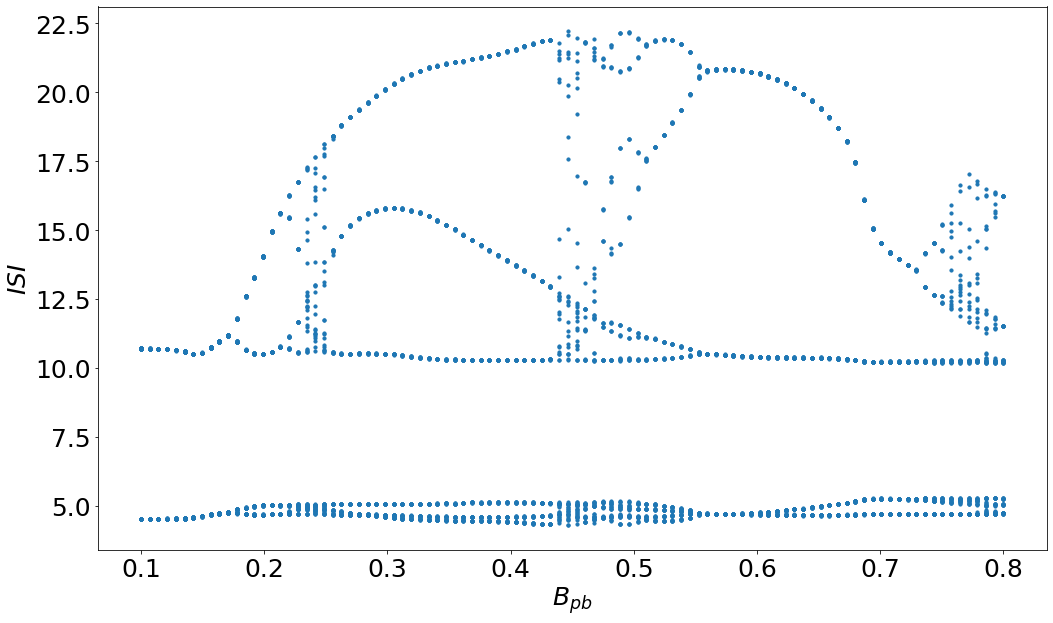

In [16]:
plt.figure(figsize=(17, 10))
plt.scatter([i[0] for i in periods], [i[1] for i in periods], s=10)
plt.ylabel('$ISI$')
plt.xlabel('$B_{pb}$')
plt.show()

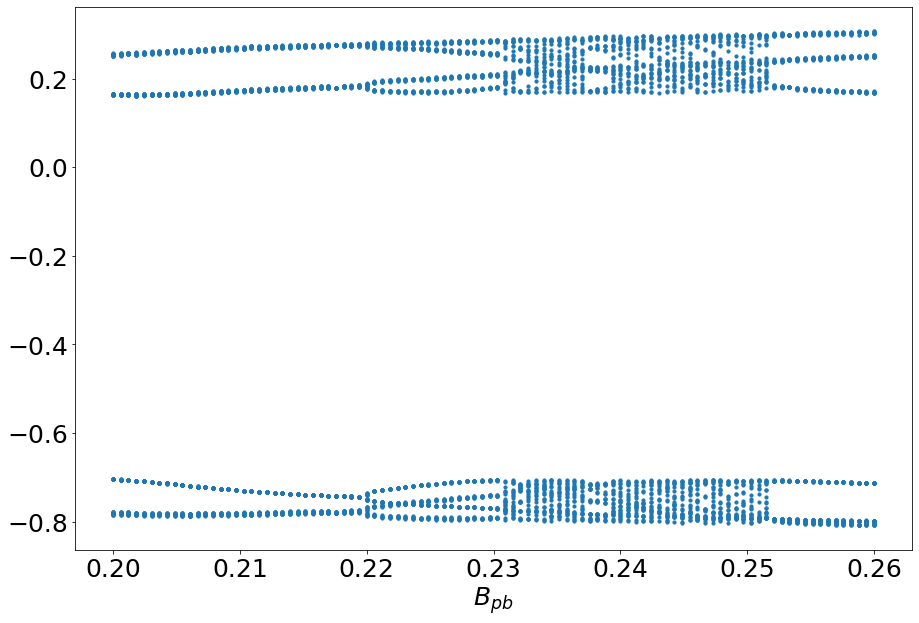

In [12]:
periods, xs = bifurcation_diagram(args, Bpbmin=0.2, Bpbmax=0.26)

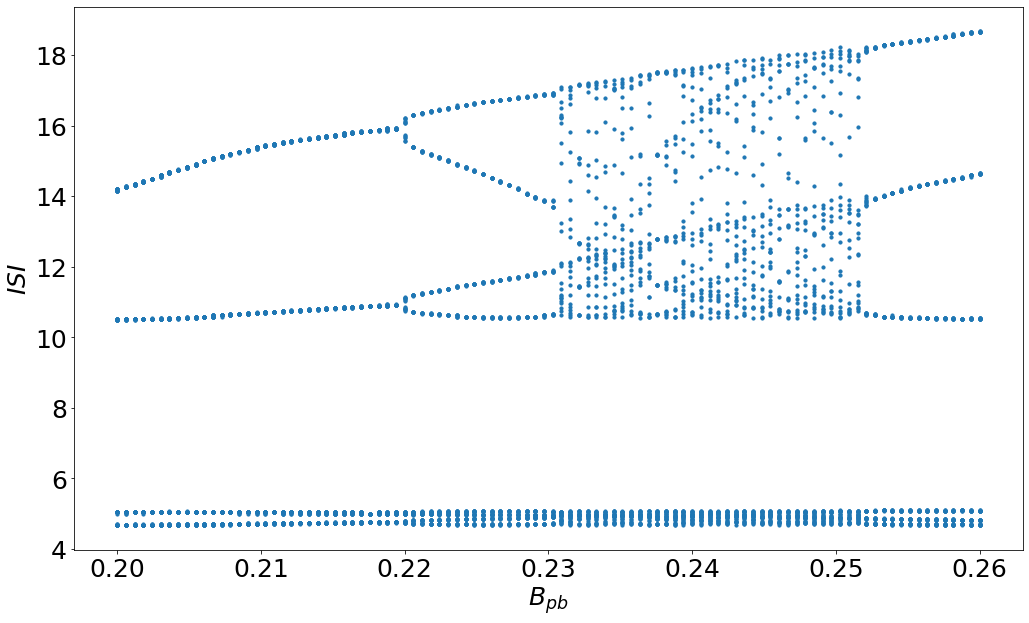

In [13]:
plt.figure(figsize=(17, 10))
plt.scatter([i[0] for i in periods], [i[1] for i in periods], s=10)
plt.ylabel('$ISI$')
plt.xlabel('$B_{pb}$')
plt.show()

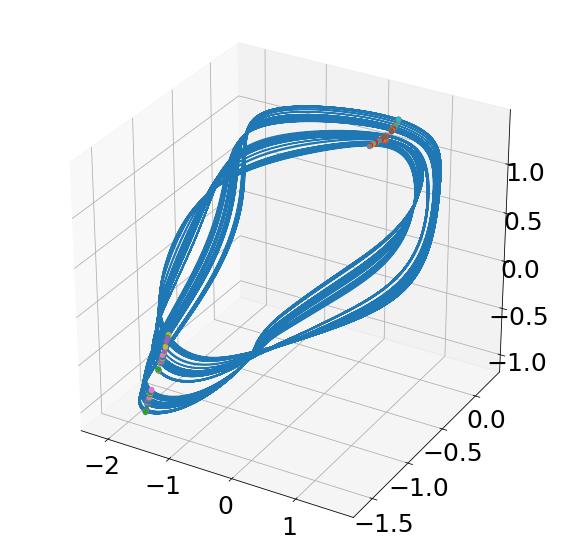

In [19]:
Bbp = 0.12
Bpb = 0.455
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

poincare_3D(args)